# Field Validation

In [35]:

import pandas as pd #reading dataset
import matplotlib as mpl    #plotting, visualization
import matplotlib.pyplot as plt
import tensorflow as tf #building model
from tensorflow.keras.models import Model
import numpy as np  #playing output with model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import joblib  
import json

import sys
sys.path.append('../../')   # Add parent directory to Python path
from utils.Preprocessing import *
from utils.Segmentation import *


In [ ]:
#Preprocessing validation data
#load data
# df_data = pd.read_csv('../../data/test/Accelerometer_ziyi.csv') 
# df_curb = pd.read_csv('../../data/test/ESP_curb.csv')
# #missing value
# missing_info = handle_missing_values_length_index(df_data)
# print(missing_info)
# output = '../../data/test/Accelerometer_ziyi_filled_missing_values.csv'
# fill_missing_values(df_data,output)
# # check missing value
# df_data.isnull().sum() 
## label data 
# df_selected = label_curb_scenes(df_data, df_curb)
# print(df_selected.shape)
# curb_indices = df_selected.index[df_selected['curb_scene'] == 1].tolist()
# print(len(curb_indices))

,Date,NTP,GNSS-Time,Acc-X,Acc-Y,Acc-Z
0,2025-03-28T16:00:44.931,2025-03-28 16:00:48.289,1743174048272,1.781281,4.735733,8.374924
1,2025-03-28T16:00:44.935,2025-03-28 16:00:48.293,1743174048276,2.643204,5.118805,8.274368
2,2025-03-28T16:00:44.942,2025-03-28 16:00:48.300,1743174048285,2.097321,5.037399,7.814682
3,2025-03-28T16:00:44.945,2025-03-28 16:00:48.303,1743174048286,1.891418,5.061340,8.034943
4,2025-03-28T16:00:44.951,2025-03-28 16:00:48.308,1743174048292,2.892197,5.272034,7.891296
...,...,...,...,...,...,...
268724,2025-03-28T16:22:59.273,2025-03-28 16:23:02.631,1743175382614,2.863464,5.655106,7.546524
268725,2025-03-28T16:22:59.277,2025-03-28 16:23:02.636,1743175382619,2.145203,5.549759,7.067688
268726,2025-03-28T16:22:59.284,2025-03-28 16:23:02.642,1743175382625,2.815582,5.281616,8.034943
268727,2025-03-28T16:22:59.288,2025-03-28 16:23:02.646,1743175382629,2.987961,5.559341,8.226471


In [10]:
#load processed data
df = pd.read_csv('../../data/test/Accelerometer_ziyi_processed_segmented.csv')
df.drop(columns=['Unnamed: 0'], inplace=True) 
df

,curb_scene,start_time,end_time,Acc-Z_1,Acc-Z_2,Acc-Z_3,Acc-Z_4,Acc-Z_5,Acc-Z_6,Acc-Z_7,...,Acc-Z_91,Acc-Z_92,Acc-Z_93,Acc-Z_94,Acc-Z_95,Acc-Z_96,Acc-Z_97,Acc-Z_98,Acc-Z_99,Acc-Z_100
0,0,2025-03-28 16:00:48.289,2025-03-28 16:00:48.780,8.374924,8.274368,7.814682,8.034943,7.891296,8.073242,8.173798,...,8.078033,8.020569,8.011002,8.078033,8.020569,8.020569,7.953537,7.991852,8.087616,8.039734
1,0,2025-03-28 16:00:48.785,2025-03-28 16:00:49.277,8.030151,7.977478,8.020569,8.054092,8.020569,8.020569,7.987061,...,7.441177,7.259216,7.584824,7.536942,7.278366,7.254425,7.503433,7.704544,7.781158,7.742844
2,0,2025-03-28 16:00:49.284,2025-03-28 16:00:49.773,7.517792,7.723694,7.939178,7.718903,7.733276,7.508209,7.498642,...,6.689407,6.689407,6.459549,6.234497,5.750870,5.477936,5.722137,6.766022,7.991852,8.384491
3,0,2025-03-28 16:00:49.778,2025-03-28 16:00:50.270,8.633499,9.428360,10.046066,8.925583,7.010223,7.082046,6.885727,...,6.689407,8.609543,9.916779,8.930374,8.427597,8.173798,8.384491,7.412445,7.776367,8.011002
4,0,2025-03-28 16:00:50.275,2025-03-28 16:00:50.766,10.960663,10.577591,9.801865,7.599197,6.493073,8.561661,8.892059,...,9.284714,9.232040,8.437164,8.576035,9.030930,9.514557,9.265564,9.686935,10.113113,9.428360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2682,1,2025-03-28 16:21:31.668,2025-03-28 16:21:32.160,10.046066,11.942276,9.356537,3.586517,5.142746,10.089172,11.200073,...,7.225708,6.698975,8.633499,8.231262,8.576035,7.527374,10.558426,9.720459,8.523361,5.875366
2683,1,2025-03-28 16:21:32.166,2025-03-28 16:22:14.440,7.886505,10.505753,10.797852,6.895294,7.934387,10.558426,8.269577,...,3.653549,-3.064575,-6.066910,-0.565033,18.751389,24.037780,18.875885,2.887405,2.944870,17.075455
2684,1,2025-03-28 16:22:14.444,2025-03-28 16:22:14.935,19.062637,13.929459,-4.845871,-11.214447,2.317581,23.755264,28.926743,...,-10.098740,-0.857117,1.987183,-9.552872,-16.045944,-7.216126,9.069229,44.838608,46.543290,37.282516
2685,1,2025-03-28 16:22:14.937,2025-03-28 16:22:51.503,28.519730,33.782180,21.030670,10.515335,-10.754761,-16.989258,-10.093948,...,6.062119,6.818680,6.900085,6.387726,5.894531,6.354217,6.603210,6.196198,5.334274,6.890518


In [23]:
# prepare data for model
# standardize data
scaler = StandardScaler()
test_data_scaled = scaler.fit_transform(df.iloc[:, 3:])
# Convert the scaled data back to DataFrames for further processing
test_data_scaled = pd.DataFrame(test_data_scaled, columns=df.columns[3:])
# Add the 'curb_scene', 'start_time', and 'end_time' columns back to the scaled DataFrames
test_data_scaled['curb_scene'] = df['curb_scene']
test_data_scaled['start_time'] = df['start_time']
test_data_scaled['end_time'] = df['end_time']
# Extract features (remove curb_scene, start_time, and end_time columns)
x_test = test_data_scaled.iloc[:, :-3]
y_true = test_data_scaled['curb_scene'].values

# # Filter and slice the data
# test_data_scaled_normal = test_data_scaled[test_data_scaled['curb_scene'] == 0].iloc[:, :-3]
# test_data_scaled_abnormal = test_data_scaled[test_data_scaled['curb_scene'] == 1].iloc[:, :-3]
# # Cast to float32
# test_data_scaled_normal = test_data_scaled_normal.astype(np.float32)
# test_data_scaled_abnormal = test_data_scaled_abnormal.astype(np.float32)
# #Reshape data for LSTM (add time step dimension)
# test_data_scaled_normal = test_data_scaled_normal.values.reshape(test_data_scaled_normal.shape[0], 1, test_data_scaled_normal.shape[1])
# test_data_scaled_abnormal = test_data_scaled_abnormal.values.reshape(test_data_scaled_abnormal.shape[0], 1, test_data_scaled_abnormal.shape[1])
# test_data_scaled_normal.shape, test_data_scaled_abnormal.shape



In [ ]:
def evaluate_classification(y_true, y_pred):
    """
    Evaluate binary classification results and display metrics and visualizations
    
    Parameters:
        y_true (array-like): Ground truth labels
        y_pred (array-like): Predicted labels
        
    Returns:
        dict: Dictionary containing the metrics (confusion matrix, accuracy, specificity, sensitivity)
    """
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Generate detailed classification report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    
    # Calculate additional metrics
    accuracy = (cm[0,0] + cm[1,1]) / np.sum(cm)
    specificity = cm[0,0] / (cm[0,0] + cm[0,1])
    sensitivity = cm[1,1] / (cm[1,0] + cm[1,1])
    
    print("\nAdditional Metrics:")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Specificity: {specificity:.3f}")  
    print(f"Sensitivity (Recall): {sensitivity:.3f}")
    
    # Visualize confusion matrix
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['0', '1'])
    plt.yticks(tick_marks, ['0', '1'])
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    # Add text annotations
    thresh = cm.max() / 2
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], 'd'),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.show()
    
    return {
        'confusion_matrix': cm,
        'accuracy': accuracy,
        'specificity': specificity,
        'sensitivity': sensitivity
    }


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.84      0.91      2631
           1       0.05      0.36      0.08        56

    accuracy                           0.83      2687
   macro avg       0.51      0.60      0.49      2687
weighted avg       0.96      0.83      0.89      2687


Additional Metrics:
Accuracy: 0.829
Specificity: 0.839
Sensitivity (Recall): 0.357


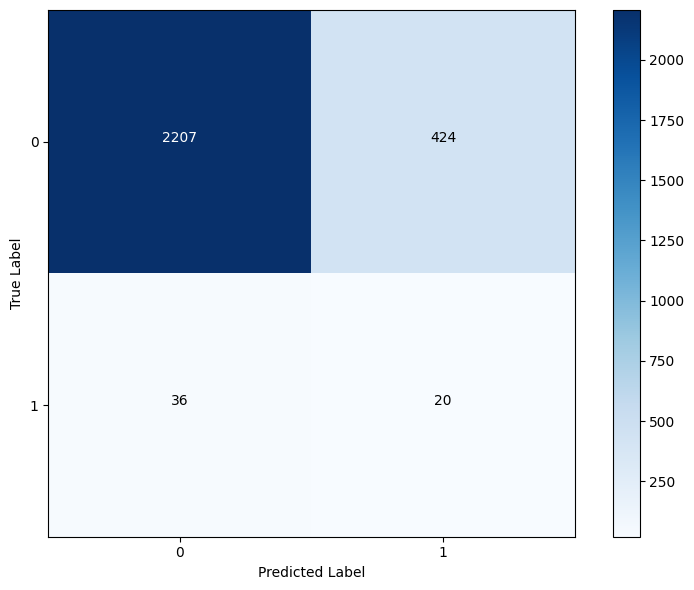

In [49]:
# Make predictions using one-class SVM
one_class_svm = joblib.load('../../models/ocsvm_best.joblib')
y_pred = one_class_svm.predict(x_test)
# Convert predictions to binary (1 for anomaly, 0 for normal)
y_pred = np.where(y_pred == -1, 1, 0)

# Evaluate results
metrics = evaluate_classification(y_true, y_pred)



In [50]:
# Make predictions using one-class SVM
autoencoder = tf.keras.models.load_model('../../models/autoencoder_best.keras')
with open('../../models/autoencoder_thresholds.json', 'r') as f:
    loaded_thresholds = json.load(f)

84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Evaluating different thresholds:
--------------------------------------------------

Results for low_threshold (threshold = 0.500000):

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      2631
           1       0.05      0.23      0.08        56

    accuracy                           0.90      2687
   macro avg       0.52      0.57      0.51      2687
weighted avg       0.96      0.90      0.93      2687


Additional Metrics:
Accuracy: 0.895
Specificity: 0.909
Sensitivity (Recall): 0.232


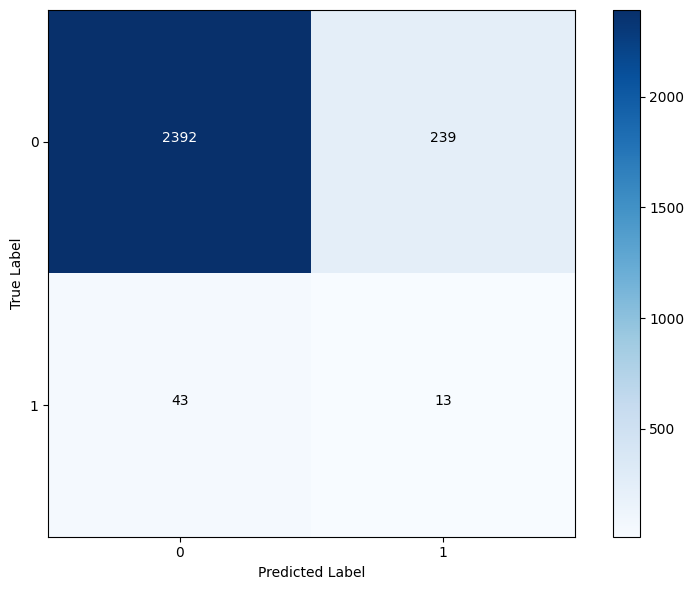


Results for middle_threshold (threshold = 0.808728):

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      2631
           1       0.05      0.12      0.07        56

    accuracy                           0.93      2687
   macro avg       0.52      0.54      0.52      2687
weighted avg       0.96      0.93      0.95      2687


Additional Metrics:
Accuracy: 0.933
Specificity: 0.950
Sensitivity (Recall): 0.125


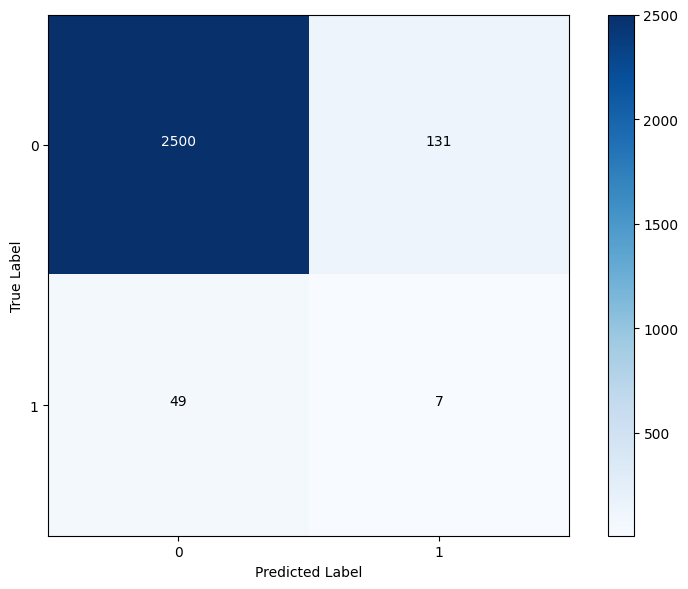


Results for high_threshold (threshold = 1.273906):

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2631
           1       0.05      0.05      0.05        56

    accuracy                           0.96      2687
   macro avg       0.51      0.52      0.51      2687
weighted avg       0.96      0.96      0.96      2687


Additional Metrics:
Accuracy: 0.957
Specificity: 0.976
Sensitivity (Recall): 0.054


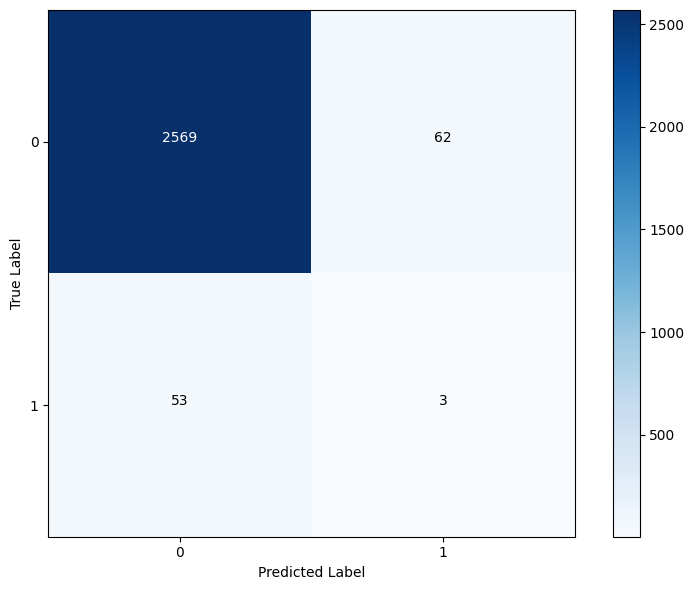

In [58]:
# Get predictions from autoencoder
predictions = autoencoder.predict(x_test)
# Calculate reconstruction error using MAE
mae = tf.keras.losses.mae(x_test, predictions)

# Test different thresholds and evaluate results
threshold_results = {}
print("Evaluating different thresholds:")
print("-" * 50)
for threshold_name, threshold_value in loaded_thresholds.items():
    # Convert TensorFlow tensor to NumPy array and make predictions
    y_pred = (mae.numpy() > threshold_value).astype(int)
    
    print(f"\nResults for {threshold_name} (threshold = {threshold_value:.6f}):")
    # Evaluate and store results
    metrics = evaluate_classification(y_true, y_pred)
    threshold_results[threshold_name] = metrics

84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Evaluating LSTM Autoencoder with different thresholds:
--------------------------------------------------

Results for low_threshold (threshold = 0.200000):

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      2631
           1       0.07      0.32      0.11        56

    accuracy                           0.89      2687
   macro avg       0.53      0.61      0.53      2687
weighted avg       0.97      0.89      0.93      2687


Additional Metrics:
Accuracy: 0.894
Specificity: 0.906
Sensitivity (Recall): 0.321


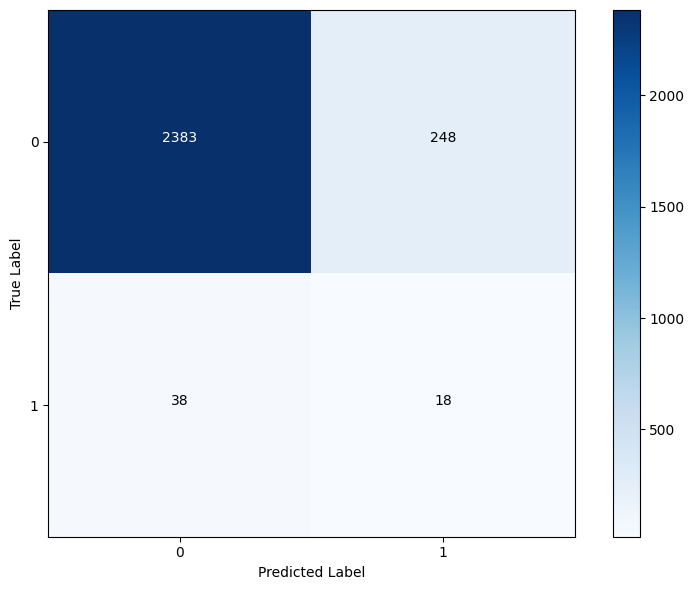


Results for middle_threshold (threshold = 0.376742):

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      2631
           1       0.06      0.16      0.09        56

    accuracy                           0.93      2687
   macro avg       0.52      0.56      0.53      2687
weighted avg       0.96      0.93      0.95      2687


Additional Metrics:
Accuracy: 0.933
Specificity: 0.949
Sensitivity (Recall): 0.161


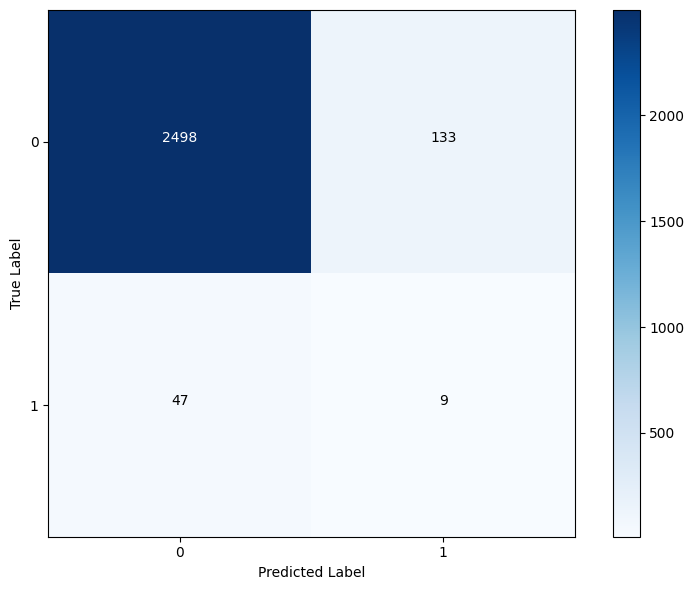


Results for high_threshold (threshold = 0.691475):

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2631
           1       0.06      0.07      0.06        56

    accuracy                           0.96      2687
   macro avg       0.52      0.52      0.52      2687
weighted avg       0.96      0.96      0.96      2687


Additional Metrics:
Accuracy: 0.956
Specificity: 0.975
Sensitivity (Recall): 0.071


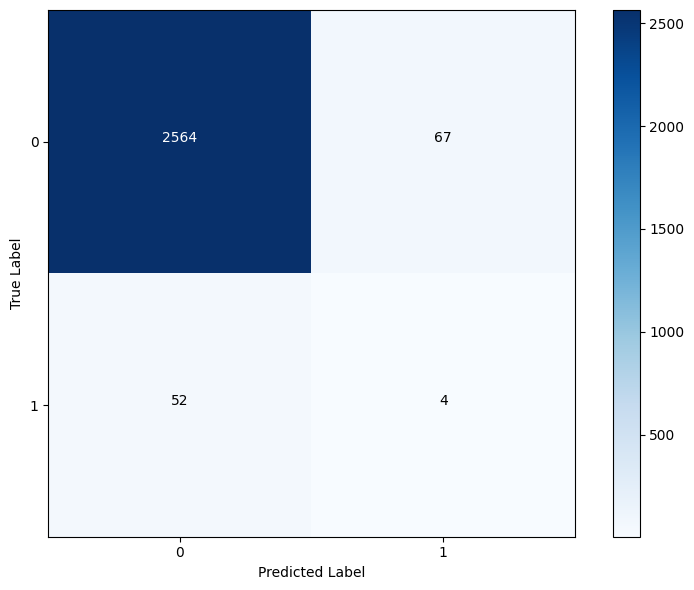

In [60]:
# Load the three pre-trained models
lstm_autoencoder = tf.keras.models.load_model('../../models/lstm_autoencoder_best.keras')
# Reshape the data for LSTM (add time step dimension)
X_test_lstm = x_test.values.reshape(x_test.shape[0], 1, x_test.shape[1])
# Get predictions from LSTM autoencoder
lstm_predictions = lstm_autoencoder.predict(X_test_lstm)

# Calculate reconstruction error using MAE
mae_lstm = tf.keras.losses.mae(
    X_test_lstm, 
    lstm_predictions
)

# Load LSTM thresholds
with open('../../models/lstm_thresholds.json', 'r') as f:
    lstm_thresholds = json.load(f)

# Test different thresholds and evaluate results
lstm_results = {}
print("Evaluating LSTM Autoencoder with different thresholds:")
print("-" * 50)

for threshold_name, threshold_value in lstm_thresholds.items():
    # Convert TensorFlow tensor to NumPy array and make predictions
    y_pred = (mae_lstm.numpy() > threshold_value).astype(int)
    
    print(f"\nResults for {threshold_name} (threshold = {threshold_value:.6f}):")
    # Evaluate and store results
    metrics = evaluate_classification(y_true, y_pred)
    lstm_results[threshold_name] = metrics